# 1. 미니배치 함수

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  # 60000, 784
print(t_train.shape)  # 60000, 10

(60000, 784)
(60000, 10)


In [2]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [3]:
np.random.choice(60000, 10)

array([17908, 21744, 34892, 48161, 37764,   722, 35396, 34184, 25118,
       39525])

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [5]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [6]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return(f(x + h) - f(x)) / h

In [7]:
np.float32(1e-50)

0.0

In [8]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

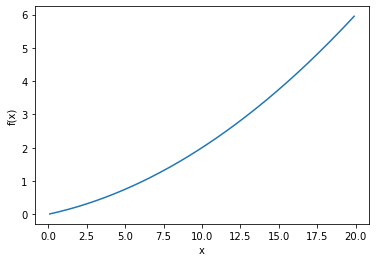

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.1, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다. 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [12]:
numerical_diff(function_1, 5)

0.1999999999990898

In [13]:
numerical_diff(function_1, 10)

0.2999999999986347

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [20]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [21]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [23]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119